In [138]:
#Name of file: Victoria_Haley_Homework1
#Date created: 08/02/2023
#Created by: Victoria Haley
#Purpose of program: To read in the data from the donors_data.csv file and represent the data as Python data
#structures.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
import csv
import seaborn as sns

In [240]:
#Introduction
''' In this report I analyze data in the donors_data.csv file provided by Syracuse University to compare the average gift amounts among certain 
 attributes. Specifically, I make the following comparisons: what is the average gift size among donors in different income groups by region, 
 the average gift size among donors in different income groups by gender, and the average gift size by donors who do or do not own homes by 
 the amount of children that donor has. I begin by first reading in the data from the file and then exploring the structure, descriptive 
 statistics of the attributes, and checking for any missing or duplicated values. Doing so allows me to see the amount of cleaning needed in 
 order to do meaningful analyses. Then, I transformed the dataframe so that unnecessary columns, like "RowId" and "RowId." were removed, as 
 well as adding a new Regions column that consists of where the donor lives based on the zipconvert_ columns. From there, I updated the no longer 
 needed zipconvert_ columns with blank values, and then removed those columns from the data frame. The program is intended to analyze the donor 
 information in order to get (hopefully meaningful) insights on the donor demographics. In addition to calculations, the comparions are shown in 
 cross-tabular tables that analyze the frequencies of each attribute as well as bar plotsto visualize the differences.'''

' In this report I analyze data in the donors_data.csv file provided by Syracuse University to compare the average gift amounts among certain \n attributes. Specifically, I make the following comparisons: what is the average gift size among donors in different income groups by region, \n the average gift size among donors in different income groups by gender, and the average gift size by donors who do or do not own homes by \n the amount of children that donor has. I begin by first reading in the data from the file and then exploring the structure, descriptive \n statistics of the attributes, and checking for any missing or duplicated values. Doing so allows me to see the amount of cleaning needed in \n order to do meaningful analyses. Then, I transformed the dataframe so that unnecessary columns, like "RowId" and "RowId." were removed, as \n well as adding a new Regions column that consists of where the donor lives based on the zipconvert_ columns. From there, I updated the no longer 

In [234]:
#First: Read in the donors data
donors = pd.read_csv('donors_data.csv')

#Create dataframe
donors_df = pd.DataFrame(donors)

#Show the first few rows of the file
print("Top 5 Rows of Donors Data")
donors_df.head()

Top 5 Rows of Donors Data


,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [70]:
#Next: Exploring the data to discover what we're working with, as well as any potential things that need to be
#cleaned up.

#Examine the data
print('Descriptive Statistics')
donors_df.describe()

Descriptive Statistics


,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,...,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,1560.500000,11615.770833,0.214423,0.185256,0.214423,0.384615,0.770192,1.069231,3.893910,0.609295,...,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,900.810746,6698.678131,0.410487,0.388568,0.410487,0.486582,0.420777,0.347688,1.636186,0.487987,...,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,780.750000,5820.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,...,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,1560.500000,11735.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,...,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,2340.250000,17435.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,3120.000000,23293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,...,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


In [71]:
#Checking to see if there are any missing values. It looks as if there is no missing data.
donors_df.isnull().sum()

Row Id             0
Row Id.            0
zipconvert_2       0
zipconvert_3       0
zipconvert_4       0
zipconvert_5       0
homeowner dummy    0
NUMCHLD            0
INCOME             0
gender dummy       0
WEALTH             0
HV                 0
Icmed              0
Icavg              0
IC15               0
NUMPROM            0
RAMNTALL           0
MAXRAMNT           0
LASTGIFT           0
totalmonths        0
TIMELAG            0
AVGGIFT            0
TARGET_B           0
TARGET_D           0
dtype: int64

In [72]:
#Checking for any duplicated data
donors_df.duplicated().values.any()

False

In [238]:
#Transforming the data data so that the table is easier to read.

#Both RowId columns aren't necessary for the purpose of this assignment
#donors_df = donors_df.drop(['Row Id', 'Row Id.'], axis=1)

#Removing the word "dummy" from columns
donors_df = donors_df.rename(columns=lambda col: col.replace(" dummy", ''))

#Combining zipconvert columns into 1 "Regions" column based on highest binary value in the column.
#donors_df['Regions'] = donors_df.loc[:,'zipconvert_2':'zipconvert_5'].idxmax(axis=1)

#Setting the original zipconvert columns with blank values
#donors_df = donors_df = donors_df.replace({'Regions':'zipconvert_'}, {'Regions':''}, regex=True)

#Removing no longer needed zipconvert columns
#donors_df = donors_df.drop(['zipconvert_2','zipconvert_3','zipconvert_4','zipconvert_5'],axis=1)

#Updated table
donors_df.head()

,homeowner,NUMCHLD,INCOME,gender,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,Regions
0,1,1,5,1,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0,3
1,1,1,1,0,7,698,422,463,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0,2
2,0,2,5,1,8,828,358,376,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0,5
3,1,1,3,0,4,1471,484,546,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0,5
4,1,1,4,0,8,547,386,432,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0,3


In [229]:
#Exploratory Data Analysis and Visualizations
'''In this section, I dive into the data to analyze the information from the comparisons mentioned above. I begin by 
 splitting the income and averge gift attributes into bins in order to examine the donors in groups based on range. 
 I also examine a cross-tabular table of each comparison to see which attributes more frequently donated  based on the 
 criteria being examined in that comparison. Lastly, I plotted the comparisons so that the results can be quickly 
 interpreted.'''

'In this section, I dive into the data to analyze the information from the comparisons mentioned above. I begin by \n splitting the income and averge gift attributes into bins in order to examine the donors in groups based on range. \n I also examine a cross-tabular table of each comparison to see which attributes more frequently donated  based on the \n criteria being examined in that comparison. Lastly, I plotted the comparisons so that the results can be quickly \n interpreted.'

In [231]:
#Comparison 1: Average Gift by Income and Gender
#Putting income into 7 bins
bins = [0,1,2,3,4,5,6,7]
income = pd.cut(donors_df['INCOME'],bins)
print(income)
print()
print('Counts of how many donors are in each income bin:')
pd.value_counts(income)

#Most donors (1053/3120) fall in between the 3 and 4 income level range

0       (4, 5]
1       (0, 1]
2       (4, 5]
3       (2, 3]
4       (3, 4]
         ...  
3115    (3, 4]
3116    (1, 2]
3117    (2, 3]
3118    (6, 7]
3119    (4, 5]
Name: INCOME, Length: 3120, dtype: category
Categories (7, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 6] < (6, 7]]

Counts of how many donors are in each income bin:


(3, 4]    1053
(4, 5]     535
(1, 2]     468
(2, 3]     296
(0, 1]     282
(5, 6]     246
(6, 7]     240
Name: INCOME, dtype: int64

In [156]:
#Putting AVGGIFT into 5 bins
avgGift = pd.cut(donors_df['AVGGIFT'],5)
print(avgGift)
print()
print('Counts of how many donors are in each average gift bin:')
pd.value_counts(avgGift)

#Most donors (3047/3120) fall in the lowest average gift size range.

0       (2.019, 26.144]
1       (2.019, 26.144]
2       (2.019, 26.144]
3       (2.019, 26.144]
4       (2.019, 26.144]
             ...       
3115    (2.019, 26.144]
3116    (26.144, 50.15]
3117    (2.019, 26.144]
3118    (2.019, 26.144]
3119    (2.019, 26.144]
Name: AVGGIFT, Length: 3120, dtype: category
Categories (5, interval[float64, right]): [(2.019, 26.144] < (26.144, 50.15] < (50.15, 74.156] < (74.156, 98.161] < (98.161, 122.167]]

Counts of how many donors are in each average gift bin:


(2.019, 26.144]      3047
(26.144, 50.15]        61
(50.15, 74.156]         5
(74.156, 98.161]        4
(98.161, 122.167]       3
Name: AVGGIFT, dtype: int64

In [151]:
#Calculating the average gift by income and gender
calc = round(donors_df.groupby(['INCOME','gender'])['AVGGIFT'].mean(),2)
print('Average Gift by Income and Gender')
print(calc)

#Range: 9.18 - 13.98

Average Gift by Income and Gender
INCOME  gender
1       0         10.05
        1          9.18
2       0         10.54
        1          9.45
3       0         10.68
        1          9.26
4       0         10.98
        1         10.29
5       0         11.42
        1         10.67
6       0         13.00
        1         11.49
7       0         13.98
        1         12.67
Name: AVGGIFT, dtype: float64


In [133]:
#Crosstab computing frequencies of the average gift amount by both income and gender
pd.crosstab([donors_df.INCOME,donors_df.gender],avgGift, margins=True)

#Gender 1 donates more frequently than Gender 0

AVGGIFT        (2.019, 26.144]  (26.144, 50.15]  (50.15, 74.156]  \
INCOME gender                                                      
1      0                   105                2                0   
       1                   171                4                0   
2      0                   164                5                0   
       1                   294                3                0   
3      0                   121                3                0   
       1                   171                1                0   
4      0                   372                9                1   
       1                   659               10                1   
5      0                   212                4                0   
       1                   313                4                1   
6      0                   107                5                0   
       1                   130                3                0   
7      0                   101                4                0   
       1                   127                4                2   
All                       3047               61                5   

AVGGIFT        (74.156, 98.161]  (98.161, 122.167]   All  
INCOME gender                                             
1      0                      0                  0   107  
       1                      0                  0   175  
2      0                      1                  0   170  
       1                      1                  0   298  
3      0                      0                  0   124  
       1                      0                  0   172  
4      0                      0                  0   382  
       1                      0                  1   671  
5      0                      0                  0   216  
       1                      0                  1   319  
6      0                      1                  0   113  
       1                      0                  0   133  
7      0                      1                  1   107  
       1                      0                  0   133  
All                           4                  3  3120

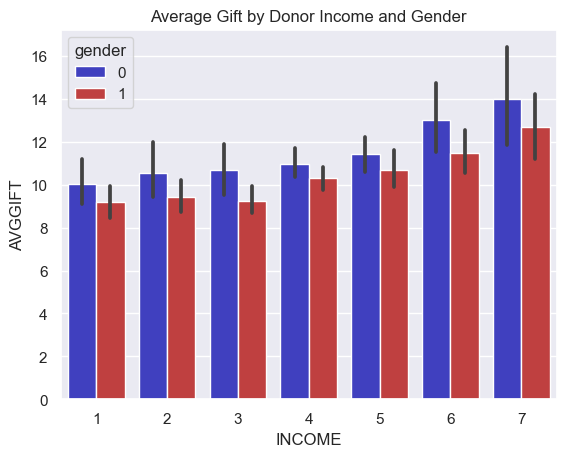

In [146]:
#Plot for comparison 1

# Initialise a base figure.
sns.set()
plt.figure()

#This is the actual plot
ax = sns.barplot(data=donors_df, x="INCOME", y="AVGGIFT", hue="gender", palette=['blue', 'red'], saturation=0.5)
ax.set_title('Average Gift by Donor Income and Gender')
plt.show()

#Average gift size increases as income level increases (positive correlation)

In [232]:
#Comparison 2: Region and Income by Average Gift
#Calculating the average gift by income and region
calc = round(donors_df.groupby(['INCOME','Regions'])['AVGGIFT'].mean(),2)
print('Average Gift by Income and Region')
print(calc)

#Average gift size also increases as income level increases here

Average Gift by Income and Region
INCOME  Regions
1       2           8.71
        3           8.43
        4           9.98
        5          10.55
2       2           9.76
        3           9.05
        4           9.73
        5          10.60
3       2          10.29
        3           9.48
        4           9.22
        5          10.20
4       2          10.22
        3           9.14
        4          10.65
        5          11.21
5       2          11.56
        3          10.80
        4           9.65
        5          11.44
6       2          11.30
        3          11.41
        4          12.21
        5          12.71
7       2          13.85
        3          13.52
        4          11.46
        5          13.94
Name: AVGGIFT, dtype: float64


In [153]:
#Crosstab computing frequencies of the average gift amount by both region and income
pd.crosstab([donors_df.Regions,donors_df.INCOME],avgGift, margins=True)

#Income level 4 tends to donate more frequently no matter the region

AVGGIFT         (2.019, 26.144]  (26.144, 50.15]  (50.15, 74.156]  \
Regions INCOME                                                      
2       1                    60                0                0   
        2                    95                3                0   
        3                    64                2                0   
        4                   227                3                0   
        5                   123                5                1   
        6                    46                0                0   
        7                    42                1                0   
3       1                    67                0                0   
        2                   115                1                0   
        3                    62                0                0   
        4                   172                2                0   
        5                    89                1                0   
        6                    32                1                0   
        7                    33                1                0   
4       1                    70                2                0   
        2                   101                3                0   
        3                    65                0                0   
        4                   206                3                0   
        5                   116                0                0   
        6                    42                2                0   
        7                    57                1                1   
5       1                    79                4                0   
        2                   147                1                0   
        3                   101                2                0   
        4                   426               11                2   
        5                   197                2                0   
        6                   117                5                0   
        7                    96                5                1   
All                        3047               61                5   

AVGGIFT         (74.156, 98.161]  (98.161, 122.167]   All  
Regions INCOME                                             
2       1                      0                  0    60  
        2                      0                  0    98  
        3                      0                  0    66  
        4                      0                  0   230  
        5                      0                  0   129  
        6                      0                  0    46  
        7                      1                  0    44  
3       1                      0                  0    67  
        2                      1                  0   117  
        3                      0                  0    62  
        4                      0                  0   174  
        5                      0                  1    91  
        6                      0                  0    33  
        7                      0                  0    34  
4       1                      0                  0    72  
        2                      0                  0   104  
        3                      0                  0    65  
        4                      0                  0   209  
        5                      0                  0   116  
        6                      0                  0    44  
        7                      0                  0    59  
5       1                      0                  0    83  
        2                      1                  0   149  
        3                      0                  0   103  
        4                      0                  1   440  
        5                      0                  0   199  
        6                      1                  0   123  
        7                      0                  1   103  
All                            4                  3  3120

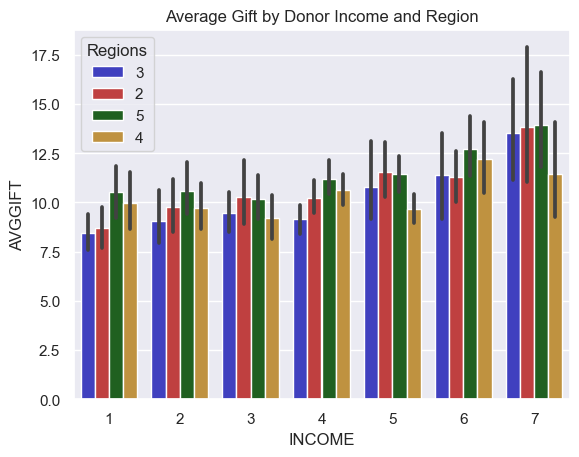

In [148]:
#Plot for comparison 2

# Initialise a base figure.
sns.set()
plt.figure()

#This is the actual plot
ax2 = sns.barplot(data=donors_df, x="INCOME", y="AVGGIFT", hue="Regions", palette=['blue', 'red','green','orange'], saturation=0.5)
ax2.set_title('Average Gift by Donor Income and Region')
plt.show()

#Region 5 and income level 7 tend to donate more on average

In [239]:
#Comparison 3: Average gift by homeowners and number of children
#Calculating the average gift by homeownership and amount of children
calc = round(donors_df.groupby(['homeowner','NUMCHLD'])['AVGGIFT'].mean(),2)
print('Average Gift by Homeownership and Amount of Children')
print(calc)

#There appears to be no correlation between the average gift size depending on homeownership or amount of children
#here.

Average Gift by Homeownership and Amount of Children
homeowner  NUMCHLD
0          1          10.79
           2           9.17
           3           9.98
           4          11.50
1          1          10.71
           2          10.04
           3           9.61
           4          10.60
           5           6.60
Name: AVGGIFT, dtype: float64


In [155]:
#Crosstab computing frequencies of the average gift amount by whether donor is a homeowner and amount of children
pd.crosstab([donors_df.homeowner,donors_df.NUMCHLD],avgGift, margins=True)

#Donors with 1 child tend to donate more frequently than those with 2-5

AVGGIFT            (2.019, 26.144]  (26.144, 50.15]  (50.15, 74.156]  \
homeowner NUMCHLD                                                      
0         1                    681               15                0   
          2                     11                0                0   
          3                      3                0                0   
          4                      4                0                0   
1         1                   2220               44                5   
          2                     86                2                0   
          3                     28                0                0   
          4                     13                0                0   
          5                      1                0                0   
All                           3047               61                5   

AVGGIFT            (74.156, 98.161]  (98.161, 122.167]   All  
homeowner NUMCHLD                                             
0         1                       2                  1   699  
          2                       0                  0    11  
          3                       0                  0     3  
          4                       0                  0     4  
1         1                       2                  2  2273  
          2                       0                  0    88  
          3                       0                  0    28  
          4                       0                  0    13  
          5                       0                  0     1  
All                               4                  3  3120

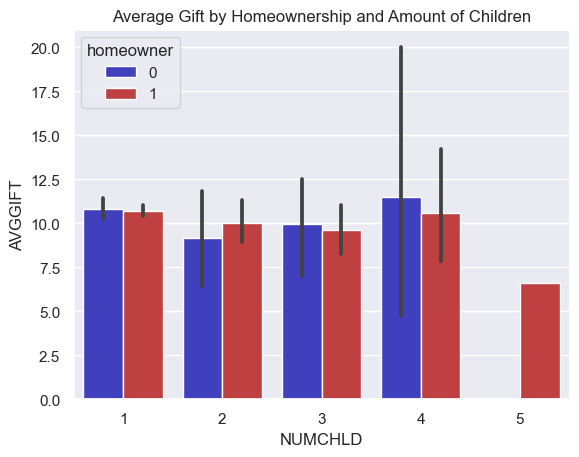

In [150]:
#Plot for comparison 3

# Initialise a base figure.
sns.set()
plt.figure()

#This is the actual plot
ax2 = sns.barplot(data=donors_df, x="NUMCHLD", y="AVGGIFT", hue="homeowner", palette=['blue', 'red'], saturation=0.5)
ax2.set_title('Average Gift by Homeownership and Amount of Children')
plt.show()

#The donors with 5 children are all homeowners.

In [230]:
#Conclusion:

'''Based on the results, the following takeaways can be made:

Comparison 1: Average Gift Size by Donor Income Level and Gender
    - Of all income levels, gender 1 usually donates more frequently, however gender 0 usually donates more on
        average
    - As income level increases, so does the average gift size. However, the average gift size is in the lower
        range: 9.18 - 13.98

Comparison 2: Average Gift Size by Donor Income Level and Region
    - Income Level 7 and Region 5 donates more on average
    - All regions and income levels donate in the lower gift range: 8.43 - 13.94
    
Comparison 3: Average Gift Size by Homeownership and Amount of Children
    - There appears to be no correlation between average gift size and homeownership and amount of children,
        however homeowners donated more frequently than non-homeowners and donors with only 1 child donated more
        frequently than donors with 2-5 children.
    - Average gift size is also in the lower range among these donors: 6.6 - 11.5
    
As can be seen, there are multiple ways to target donors. Based on the donors analyzed in this report, most
(about 98%) tend to donate in the smaller gift size range. At a quick glance, donors in the higher income levels
that live in Region 5 are a safe bet. Further investigation into follow-up comparisons would be of benefit. 
Ultimately, using any of the information provided by the results of any of the three comparisons made in this
report would be helpful in trying to understand the behaviors of future donors based on their demographics.

'''

'Based on the results, the following takeaways can be made:\n\nComparison 1: Average Gift Size by Donor Income Level and Gender\n    - Of all income levels, gender 1 usually donates more frequently, however gender 0 usually donates more on\n        average\n    - As income level increases, so does the average gift size. However, the average gift size is in the lower\n        range: 9.18 - 13.98\n\nComparison 2: Average Gift Size by Donor Income Level and Region\n    - Income Level 7 and Region 5 donates more on average\n    - All regions and income levels donate in the lower gift range: 8.43 - 13.94\n    \nComparison 3: Average Gift Size by Homeownership and Amount of Children\n    - There appears to be no correlation between average gift size and homeownership and amount of children,\n        however homeowners donated more frequently than non-homeowners and donors with only 1 child donated more\n        frequently than donors with 2-5 children.\n    - Average gift size is also in the